In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import plotly.express as px
import folium

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

dataset=pd.read_csv('hotel_bookings.csv')
print(dataset)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [161]:
dataset.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,7/3/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,7/3/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,4/22/2015


In [162]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [163]:
#missing values => Country Has 488 missing Values, Agent has 16340 missing value & company has 112593 missing value
dataset.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [164]:
dataset["country"].nunique()

177

In [165]:
dataset["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [166]:
#replace missing values:
fillna = {"children:": 0.0,"country": "Unknown", "agent": 0, "company": 0}
dataset1 = dataset.fillna(fillna)

dataset1["meal"].replace("Undefined", "SC", inplace=True)

#dropping entries with no guests (=0)
zero_guests = list(dataset1.loc[dataset1["adults"]
                   + dataset1["children"]
                   + dataset1["babies"]==0].index)
dataset1.drop(dataset1.index[zero_guests], inplace=True)

In [167]:
dataset1.shape

(119210, 32)

In [168]:
print(dataset)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [201]:
#after cleaning => separate Resort and City hotel
#only bookings that were not canceled are included. 
rh = dataset1.loc[(dataset1["hotel"] == "Resort Hotel") & (dataset1["is_canceled"] == 0)]
ch = dataset1.loc[(dataset1["hotel"] == "City Hotel") & (dataset1["is_canceled"] == 0)]

In [203]:
#get number of acutal guests by country
country_data = pd.DataFrame(dataset1.loc[dataset1["is_canceled"] == 0]["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
#country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"

# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [171]:
# show on map
guest_map = px.choropleth(country_data,locations=country_data.index,
                          color=country_data["Guests in %"],hover_name=country_data.index,
                          color_continuous_scale=px.colors.sequential.Plasma,title="Home country of guests")
guest_map.show()

In [172]:
rh["adr_pp"] = rh["adr"] / (rh["adults"] + rh["children"])
ch["adr_pp"] = ch["adr"] / (ch["adults"] + ch["children"])


<ipython-input-172-fe0f2a2eefb7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-172-fe0f2a2eefb7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [173]:
print("""From all non cancelled bookings, across all room types and meals, the average prices are:
Resort hotel: {:.2f} € per night and person.
City hotel: {:.2f} € per night and person."""
      .format(rh["adr_pp"].mean(), ch["adr_pp"].mean()))

From all non cancelled bookings, across all room types and meals, the average prices are:
Resort hotel: 47.49 € per night and person.
City hotel: 59.27 € per night and person.


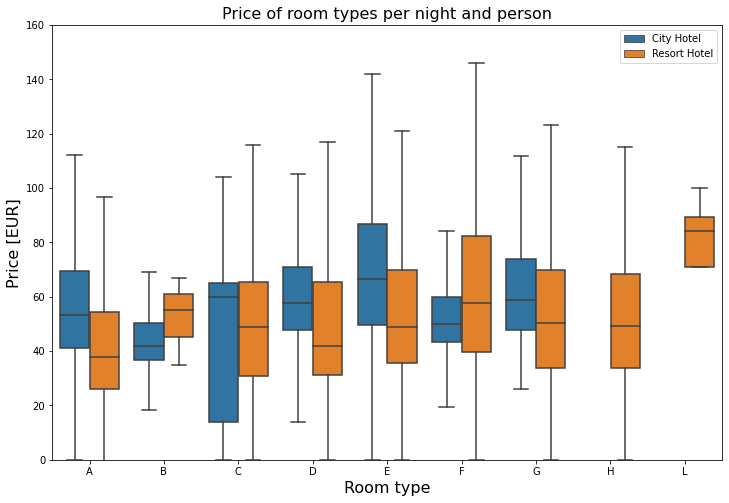

In [174]:
# normalize price per night (adr):
full_data_cln["adr_pp"] = full_data_cln["adr"] / (full_data_cln["adults"] + full_data_cln["children"])
full_data_guests = full_data_cln.loc[full_data_cln["is_canceled"] == 0] # only actual gusts
room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

Text(0, 0.5, 'Count')

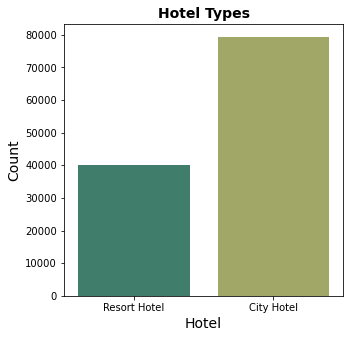

In [175]:
#hotel types using countplot

plt.figure(figsize=(5,5))
sns.countplot(x='hotel', data = dataset, palette='gist_earth')
plt.title('Hotel Types', weight='bold', fontsize=14)
plt.xlabel('Hotel', fontsize=14)
plt.ylabel('Count', fontsize=14)

Text(0, 0.5, 'Count')

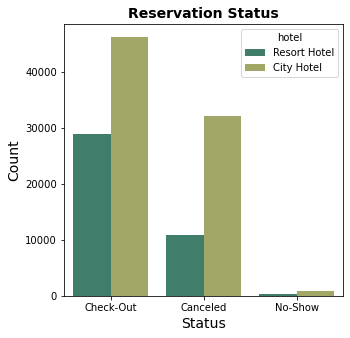

In [176]:
plt.figure(figsize=(5,5))
sns.countplot(x='reservation_status', hue='hotel', data = dataset, palette='gist_earth')
plt.title('Reservation Status', weight='bold', fontsize=14)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

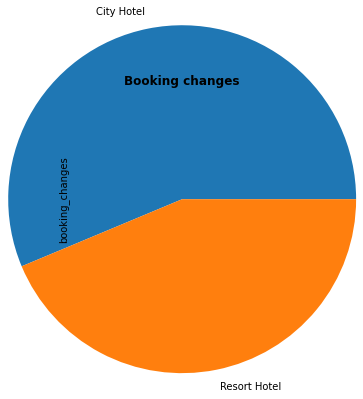

In [177]:
#booking changes based on hotel types using plot pie , look up how to remove booking_changes
dataset.groupby(['hotel'])['booking_changes'].sum().plot.pie(radius = 2)
plt.title('Booking changes', weight='bold')
plt.show()

Text(0.5, 0, 'Canceled or Not Canceled')

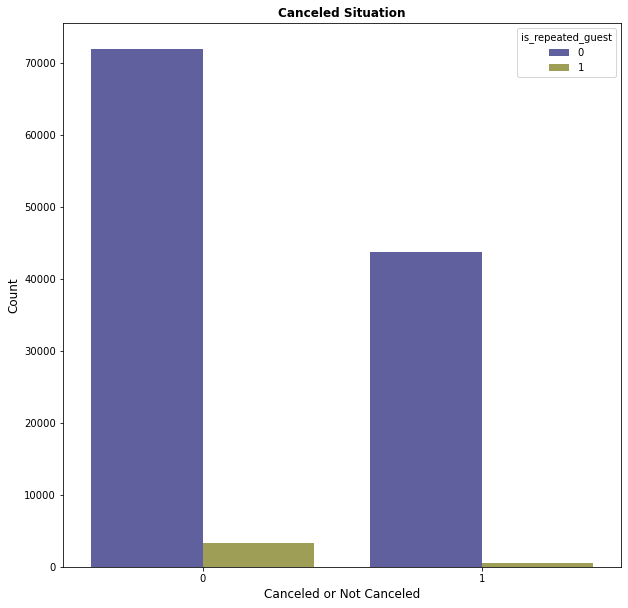

In [184]:
#cancelation using countplot

plt.figure(figsize=(10,10))
sns.countplot(x='is_canceled', hue='is_repeated_guest',data= dataset, palette='gist_stern')
plt.title('Canceled Situation', weight='bold')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Canceled or Not Canceled', fontsize=12)

Text(0, 0.5, 'Count')

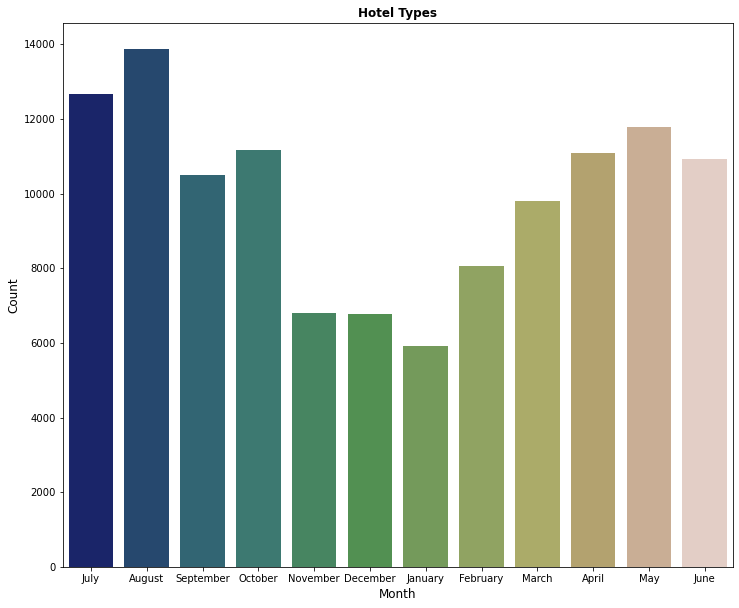

In [179]:
#comparing arrivals each month (Ask tutor how to list them in the same order)
plt.figure(figsize=(12,10))
sns.countplot(x='arrival_date_month', data = dataset, palette='gist_earth')
plt.title('Hotel Types', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

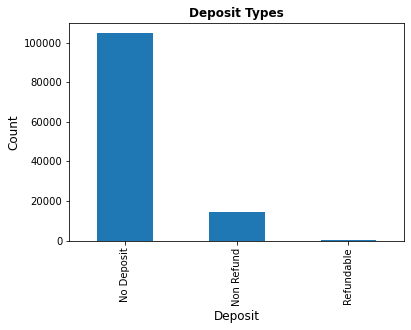

In [180]:
dataset.groupby(['deposit_type']).size().plot.bar()
plt.title('Deposit Types', weight='bold')
plt.xlabel('Deposit', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

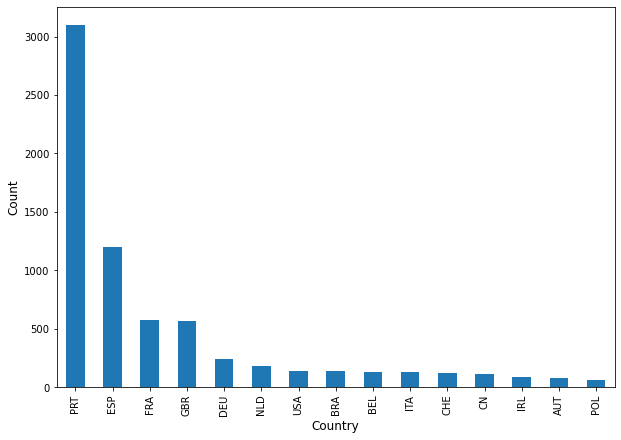

In [181]:
dataset.groupby(['country'])['required_car_parking_spaces'].sum().sort_values(ascending=False).head(15).plot.bar(figsize=(10,7))
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

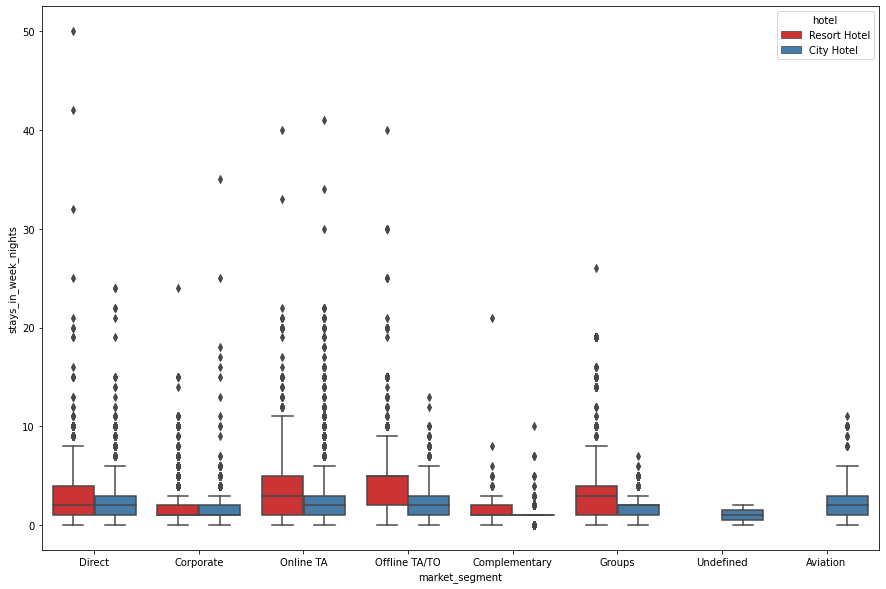

In [190]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = dataset, hue = "hotel", palette = 'Set1');

In [191]:
#drop company since it has many missing values
dataset = dataset.drop(['company'], axis = 1)

KeyError: "['company'] not found in axis"

In [193]:
dataset['children'] = dataset['children'].fillna(0)

In [195]:
cor_data = dataset.copy()

In [198]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [199]:
cor_data.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,-0.008283,0.230641,0.014785,0.122884
children,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,0.041070,-0.033271,0.324853,0.056255,0.081736
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,-0.010621,0.029186,0.037383,0.097889


In [200]:
cor_data.corr()["is_canceled"].sort_values()

total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
booking_changes                  -0.144381
is_repeated_guest                -0.084793
agent                            -0.083114
previous_bookings_not_canceled   -0.057358
babies                           -0.032491
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
children                          0.005036
arrival_date_week_number          0.008148
arrival_date_year                 0.016660
stays_in_week_nights              0.024765
adr                               0.047557
days_in_waiting_list              0.054186
adults                            0.060017
previous_cancellations            0.110133
lead_time                         0.293123
is_canceled                       1.000000
Name: is_canceled, dtype: float64

In [189]:
dataset['meal'].unique()
dataset['market_segment'].unique()
dataset['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [159]:
"""
dataset['hotel'] = dataset['hotel'].replace({'Resort Hotel': 0, 'City Hotel': 1})
dataset['meal'] = dataset['meal'].replace({'undefined': 0, 'BB': 1,'FB':2, 'HB':3, 'SC':4})
dataset['market_segment'] = dataset['market_segment'].replace({'Direct':0, 'Corporate':1, 'Online TA':2, 
                                                               'Offline TA/TO':3, 'Complementary':4, 'Groups':5,
                                                               'Undefined':6, 'Aviation':7})
dataset['distribution_channel'] = dataset['distribution_channel'].replace({'Direct':0, 'Corporate':1, 
                                                                           'TA/TO':2, 'Undefined':3, 'GDS':4})
dataset['reserved_room_type'] = dataset['reserved_room_type'].replace({'C':0, 'A':1, 'D':2, 'E':3, 'G':4, 
                                                                       'F':5, 'H':6, 'L':7, 'P':8, 'B':9})
dataset['assigned_room_type'] = dataset['assigned_room_type'].replace({'C':0, 'A':1, 'D':2, 'E':3, 'G':4, 
                                                                       'F':5, 'H':6, 'L':7, 'P':8, 'B':9})
dataset['deposit_type'] = dataset['deposit_type'].replace({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 2})
dataset['customer_type'] = dataset['customer_type'].replace({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group':3})
dataset['reservation_status'] = dataset['reservation_status'].replace({'Check-Out':0, 'Canceled':1, 'No-Show':2}) 
print(dataset)
"""

"\ndataset['hotel'] = dataset['hotel'].replace({'Resort Hotel': 0, 'City Hotel': 1})\ndataset['meal'] = dataset['meal'].replace({'undefined': 0, 'BB': 1,'FB':2, 'HB':3, 'SC':4})\ndataset['market_segment'] = dataset['market_segment'].replace({'Direct':0, 'Corporate':1, 'Online TA':2, \n                                                               'Offline TA/TO':3, 'Complementary':4, 'Groups':5,\n                                                               'Undefined':6, 'Aviation':7})\ndataset['distribution_channel'] = dataset['distribution_channel'].replace({'Direct':0, 'Corporate':1, \n                                                                           'TA/TO':2, 'Undefined':3, 'GDS':4})\ndataset['reserved_room_type'] = dataset['reserved_room_type'].replace({'C':0, 'A':1, 'D':2, 'E':3, 'G':4, \n                                                                       'F':5, 'H':6, 'L':7, 'P':8, 'B':9})\ndataset['assigned_room_type'] = dataset['assigned_room_type'].replace({'C'

In [153]:
dataset.isnull()
print(dataset.fillna(0))

        hotel  is_canceled  lead_time  stays_in_weekend_nights  \
0           0            0        342                        0   
1           0            0        737                        0   
2           0            0          7                        0   
3           0            0         13                        0   
4           0            0         14                        0   
...       ...          ...        ...                      ...   
119385      1            0         23                        2   
119386      1            0        102                        2   
119387      1            0         34                        2   
119388      1            0        109                        2   
119389      1            0        205                        2   

        stays_in_week_nights  adults  children  babies meal country  ...  \
0                          0       2       0.0       0    1     PRT  ...   
1                          0       2       0.0       0 

In [145]:
dataset.drop(["arrival_date_year", "arrival_date_month","arrival_date_week_number", "arrival_date_day_of_month"], axis=1, inplace=True)
dataset.head()

KeyError: "['arrival_date_year' 'arrival_date_month' 'arrival_date_week_number'\n 'arrival_date_day_of_month'] not found in axis"

In [146]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [147]:
#Logit Model
array = dataset.values
#14 bc we removed 2 col
X = array[:,2:31]
Y = array[:,1]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y,
test_size=validation_size, random_state=seed)
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'
#estimate model using Logistic Regression
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(LogisticRegression(), X_train, Y_train, cv=kfold, scoring=scoring)
print(cv_results.mean(),cv_results.std())

C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sp

nan nan


C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sp

In [148]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [149]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))

In [150]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sp

C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sp

LR: nan (nan)


C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 424, in fit
    X, y = self._validate_data(X, y, ensure_min_samples=2, estimator=self,
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_s

LDA: nan (nan)


C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1131, in fit
    X, y = self._validate_data(X, y, accept_sparse="csr",
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
 

KNN: nan (nan)


C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\valida

CART: nan (nan)


C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 160, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "C:\

SVM: nan (nan)


C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 210, in fit
    X, y = self._validate_data(X, y)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "C:\Users\nnquy\anac

NB: nan (nan)


C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 210, in fit
    X, y = self._validate_data(X, y)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "C:\Users\nnquy\anac

In [151]:
#Linear Regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cv_results = model_selection.cross_val_score(LinearDiscriminantAnalysis(), X_train, Y_train, cv=kfold, scoring=scoring)
print(cv_results.mean(),cv_results.std())

C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 424, in fit
    X, y = self._validate_data(X, y, ensure_min_samples=2, estimator=self,
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_s

nan nan


C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 424, in fit
    X, y = self._validate_data(X, y, ensure_min_samples=2, estimator=self,
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\nnquy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_s